In [1]:
import pandas as pd
import numpy as np

In [12]:
%config Completer.use_jedi = False

In [7]:
# Load Data
x_df = pd.read_csv('x_filt_df.tsv', sep = '\t')
x_df.drop('Unnamed: 0', axis = 1, inplace = True)

y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')

y_df = y_all_df.loc[:, ['vb_ros_mean']]

In [13]:
# Model module 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [17]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Various Regression Models
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Support Vector Regressor' : SVR(),
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor(),
    'Bayesian Ridge' : BayesianRidge(),
    'Elastic Net' : ElasticNet(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'MLP Regressor' : MLPRegressor(),
    'XGBoost Regressor' : XGBRegressor(),
    'LightGBM Regressor' : LGBMRegressor()
}

# Parameter grids for linear models and tree-based models
linear_paramgrids = {
    'Ridge Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Support Vector Regression' : {'C' : [0.1, 1.0, 10.0], 'epsilon' : [0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor' : {'n_neighbors' : [3, 5, 7, 9]},
    'Bayesian Ridge' : {},
    'Elastic Net' : {'alpha' : [0.1, 1.0, 10.0], 'l1_ratio' : [0.1, 0.5, 0.9]}
}

tree_param_grids = {
    'Decision Tree Regressor' : {'max_depth' : [None, 10, 20, 30]},
    'Random Forest Regressor' : {'n_estimators' : [100, 200 ,300], 'max_depth' : [None, 10, 20]},
    'Gradient Boosting Regressor' : {'n_estimators' : [100, 200 ,300], 'learning_rate' : [0.01, 0.1, 0.2]},
    'AdaBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 1.0]},
    'MLP Regressor' : {'hidden_layer_sizes' : [(50, ), (100, ), (50, 50)], 'alpha' : [0.0001, 0.001, 0.01]},
    'XGBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'LigthGBM Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]}
}


# Result Save
best_models = {}
best_params = {}

# Model Class dict
model_classes = {
    'Ridge Regression': Ridge,
    'Lasso Regression': Lasso,
    'Support Vector Regression': SVR,
    'K-Nearest Neighbors Regressor': KNeighborsRegressor,
    'Decision Tree Regressor': DecisionTreeRegressor,
    'Random Forest Regressor': RandomForestRegressor,
    'Gradient Boosting Regressor': GradientBoostingRegressor,
    'Bayesian Ridge': BayesianRidge,
    'Elastic Net': ElasticNet,
    'AdaBoost Regressor': AdaBoostRegressor,
    'MLP Regressor': MLPRegressor,
    'XGBoost Regressor': XGBRegressor,
    'LightGBM Regressor': LGBMRegressor
}

# GridSearchCV and training loop for linear models
for model_name, param_grid in linear_paramgrids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator=model , param_grid= param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  R² Score = {r2}\n')

# GridSearchCV and training loop for tree-based models
for model_name, param_grid in tree_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  R² Score = {r2}\n')


# Output the best parameters for each model
print("Best parameters:")
for model_name, params in best_params.items():
    print(f'{model_name}: {params}')

Ridge Regression Best Parameters: {'alpha': 100.0}
Ridge Regression (After tuning):
  Mean Squared Error = 0.21389842202770087
  R² Score = 0.18615175288038044

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression (After tuning):
  Mean Squared Error = 0.27914395887915494
  R² Score = -0.062096762913054215

Support Vector Regression Best Parameters: {'C': 10.0, 'epsilon': 0.1}
Support Vector Regression (After tuning):
  Mean Squared Error = 0.20762509404537718
  R² Score = 0.21002073206041105

K-Nearest Neighbors Regressor Best Parameters: {'n_neighbors': 3}
K-Nearest Neighbors Regressor (After tuning):
  Mean Squared Error = 0.2513896908459306
  R² Score = 0.043503653278901155

Bayesian Ridge Best Parameters: {}
Bayesian Ridge (After tuning):
  Mean Squared Error = 0.2429674569263255
  R² Score = 0.07554886542831274



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.461e-01, tolerance: 1.990e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.012e-02, tolerance: 1.168e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.588e-01, tolerance: 

Elastic Net Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Elastic Net (After tuning):
  Mean Squared Error = 0.21628502150665976
  R² Score = 0.17707113515485207

Decision Tree Regressor Best Parameters: {'max_depth': 30}
Decision Tree Regressor (After tuning):
  Mean Squared Error = 0.35484641229859243
  R² Score = -0.3501321230340606

Random Forest Regressor Best Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Regressor (After tuning):
  Mean Squared Error = 0.21220283047325378
  R² Score = 0.19260319932554826

Gradient Boosting Regressor Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Gradient Boosting Regressor (After tuning):
  Mean Squared Error = 0.22572795538398102
  R² Score = 0.14114232786926528

AdaBoost Regressor Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost Regressor (After tuning):
  Mean Squared Error = 0.22323760560020092
  R² Score = 0.15061769840744377



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
MLP Regressor (After tuning):
  Mean Squared Error = 0.1977480285894823
  R² Score = 0.24760133846116694

XGBoost Regressor Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
XGBoost Regressor (After tuning):
  Mean Squared Error = 0.24781901220455582
  R² Score = 0.05708949709094202



KeyError: 'LigthGBM Regressor'

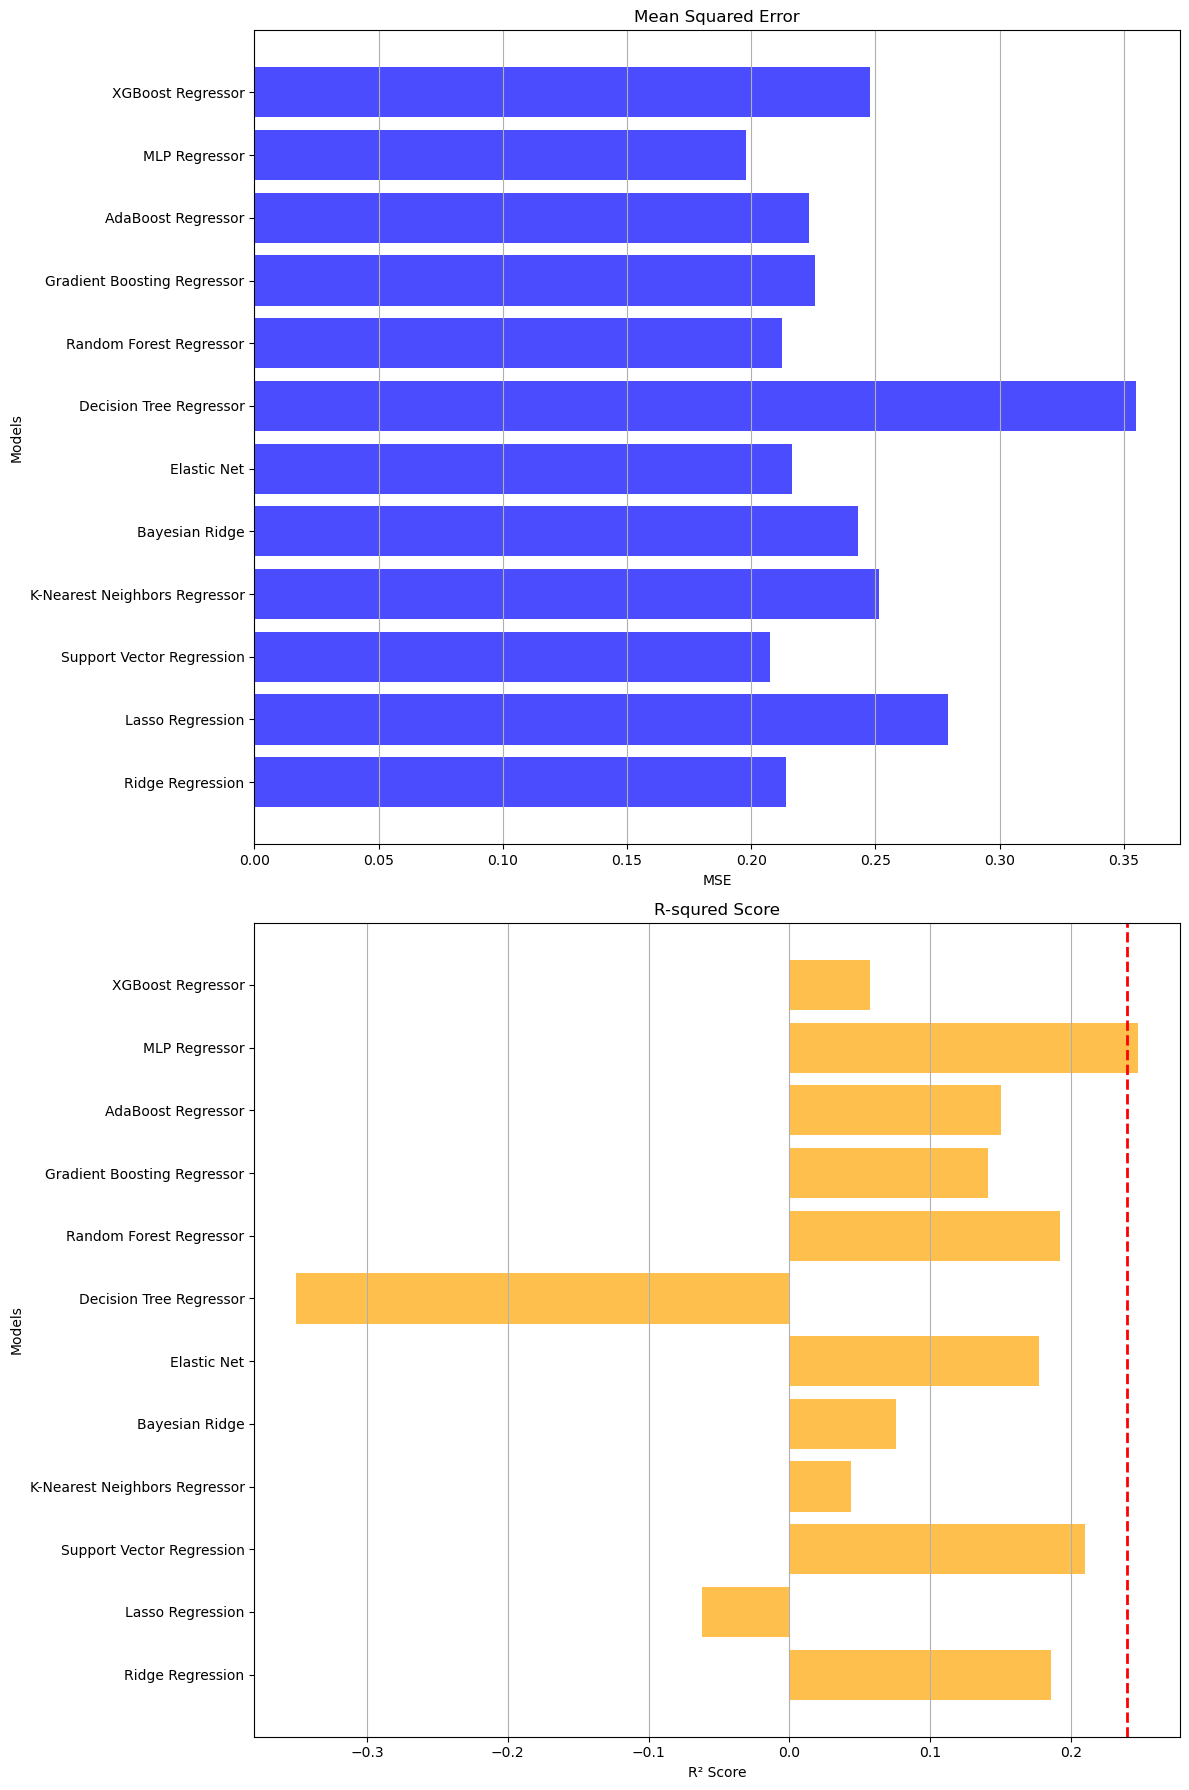

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to sroe evaluation metrics
model_names = []
mse_scores = []
r2_scores = []

# Evaluate and collect scores for each model
for model_name, model in best_models.items():
    # Make predictions on the test data using the already trained model
    y_pred  = model.predict(X_test)

    # Calculate evalutation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    # Stroe scores and model names
    model_names.append(model_name)
    mse_scores.append(mse)
    r2_scores.append(r2)


# Plotting the scores
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 18))

# Mean Squared Error plot
ax1.barh(model_names, mse_scores, color = 'blue', alpha = 0.7)
ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.set_ylabel('Models')
ax1.xaxis.grid(True)

# R-Squared plot
ax2.barh(model_names, r2_scores, color = 'orange', alpha = 0.7)
ax2.set_title('R-squred Score')
ax2.set_xlabel('R² Score')
ax2.set_ylabel('Models')
ax2.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax2.xaxis.grid(True)

plt.tight_layout()
plt.savefig('accuracy_result.png')
plt.show()